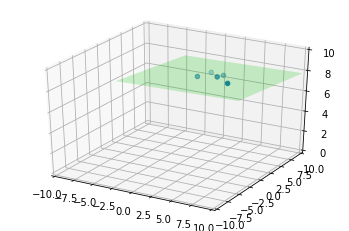

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import scipy.optimize
import functools
import math

def plane(x, y, params):
    a = params[0]
    b = params[1]
    c = params[2]
    z = a*x + b*y + c
    return z

def error(params, points):
    result = 0
    for (x,y,z) in points:
        plane_z = plane(x, y, params)
        diff = abs(plane_z - z)
        result += diff**2
    return result

def cross(a, b):
    return [a[1]*b[2] - a[2]*b[1],
            a[2]*b[0] - a[0]*b[2],
            a[0]*b[1] - a[1]*b[0]]

points = [(1.1,2.1,8.1),
          (3.2,4.2,8.0),
          (5.3,1.3,8.2),
          (3.4,2.4,8.3),
          (1.5,4.5,8.0)]

fun = functools.partial(error, points=points)
params0 = [0, 0, 0]
res = scipy.optimize.minimize(fun, params0)

a = res.x[0]
b = res.x[1]
c = res.x[2]

xs, ys, zs = zip(*points)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs, ys, zs)

point  = np.array([0.0, 0.0, c])
normal = np.array(cross([1,0,a], [0,1,b]))
d = -point.dot(normal)
xx, yy = np.meshgrid([-5,10], [-5,10])
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]
ax.plot_surface(xx, yy, z, alpha=0.2, color=[0,1,0])

ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_zlim(  0,10)

plt.show()

In [2]:
def distance_delta(P, Q, params):
    print(params)
    T = np.array([[params[0],params[1],params[2],params[3]],
        [params[4],params[5],params[6],params[7]],
        [params[8],params[9],params[10],params[11]],
        [0,0,0,1]])
    delta = np.linalg.norm(Q - T@P)
    return delta

def distanceBis_delta(P, Q, params):
    T1 = np.array([[params[0],params[1],params[2],params[3]],
        [params[4],params[5],params[6],params[7]],
        [params[8],params[9],params[10],params[11]],
        [0,0,0,1]])
    T2 = np.array([[params[12],params[13],params[14],params[15]],
        [params[16],params[17],params[18],params[19]],
        [params[20],params[21],params[22],params[23]],
        [0,0,0,1]])
    delta = np.linalg.norm(T2@Q - T1@P)
    return delta

def error_delta(delta_m, delta_t):
    error_delta = (delta_m-delta_t)**2
    return error_delta

def objFunc(params0, points, distance):
    result = 0
    for p1,p2,p3 in points:
        distance12 = distance_delta(p2, p1, params0[0:12])
        distance13 = distance_delta(p3, p1, params0[12:24])
        distance23 = distanceBis_delta(p2, p3, params0)
        e1 = error_delta(distance12,distance[0])
        e2 = error_delta(distance13,distance[1])
        e3 = error_delta(distance23,distance[2])
        result += e1 + e2 + e3
    return result

In [3]:
import random
p1_i = np.array([1.4, 0, 0, 1])
p2_i = np.array([1, 1.2, 0.2, 1])
p3_i = np.array([-0.3, 0.5, -0.4, 1])
points = []
distance_after = []
for i in range(0,24):
    theta =  random.randrange(0, 360)*3.1415926/180
    distance =  random.randrange(0, 200)
    angle =  random.randrange(0, 360)*3.1415926/180
    T_r = np.identity(4)
    T_r[0:2,0:2] = np.array([[math.cos(theta), -math.sin(theta)],[math.sin(theta), math.cos(theta)]])
    T_r[:,3] = np.array([distance*math.cos(angle),distance*math.sin(angle), 0 , 1])
    #print(theta)
    #T = np.array([i*math.cos(j),i*math.sin(j), 0 , 0])
    #p1 = p1_i + T
    #p2 = p2_i + T
    #p3 = p3_i + T
    p1 = T_r@p1_i
    p2 = T_r@p2_i
    p3 = T_r@p3_i 
    points.append(np.array([np.array(p1),np.array(p2),np.array(p3)]))
    d12 = round(np.linalg.norm(p1-p2),2)
    d13 = round(np.linalg.norm(p1-p3),2)
    d23 = round(np.linalg.norm(p3-p2),2)
    distance_after.append([d12, d13, d23])
points_arr = np.array(points)
#print(points_arr)
#print(distance_after)

In [5]:
points_arr_new = np.zeros_like(points_arr)
T2 = np.array([[1,0,0,-2],[0,1,0,-6],[0,0,1,0],[0,0,0,1]])
T3 = np.array([[1,0,0,10],[0,1,0,5],[0,0,1,0],[0,0,0,1]])
points_arr_new[:,0] = points_arr[:,0]
points_arr_new[:,1] = (T2@points_arr[:,1].T).T
points_arr_new[:,2] = (T3@points_arr[:,2].T).T
#print(points_arr[1])
#print(points_arr_new[1])

<IPython.core.display.Javascript object>


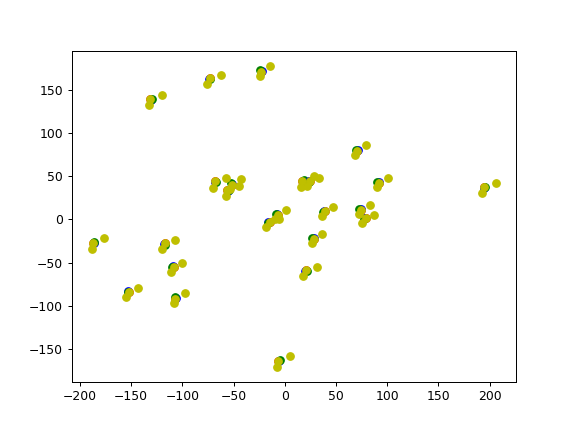

[[1.281, 1.817, 1.594], [1.281, 1.817, 1.594], [1.281, 1.817, 1.594], [1.281, 1.817, 1.594], [1.281, 1.817, 1.594], [1.281, 1.817, 1.594], [1.281, 1.817, 1.594], [1.281, 1.817, 1.594], [1.281, 1.817, 1.594], [1.281, 1.817, 1.594], [1.281, 1.817, 1.594], [1.281, 1.817, 1.594], [1.281, 1.817, 1.594], [1.281, 1.817, 1.594], [1.281, 1.817, 1.594], [1.281, 1.817, 1.594], [1.281, 1.817, 1.594], [1.281, 1.817, 1.594], [1.281, 1.817, 1.594], [1.281, 1.817, 1.594], [1.281, 1.817, 1.594], [1.281, 1.817, 1.594], [1.281, 1.817, 1.594], [1.281, 1.817, 1.594]]


In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure(0)
dist_aftert = []
for i,j,k in points_arr:
    dist12 = round(np.linalg.norm(i[0:3]-j[0:3]),3)
    dist13 = round(np.linalg.norm(i[0:3]-k[0:3]),3)
    dist23 = round(np.linalg.norm(j[0:3]-k[0:3]),3)
    dist_aftert.append([dist12,dist13,dist23])
    plt.scatter(i[0], i[1],color='r')
    plt.scatter(j[0], j[1],color='b')
    plt.scatter(k[0], k[1],color='g')
for i,j,k in points_arr_new:
    plt.scatter(i[0], i[1],color='y')
    plt.scatter(j[0], j[1],color='y')
    plt.scatter(k[0], k[1],color='y')
plt.show()
print(dist_aftert)

In [7]:
def con_real(params0):
    return np.sum(np.iscomplex(params0))

def con_ortho1(params0):
    Tt = np.array([[params0[0],params0[1],params0[2]],
                   [params0[4],params0[5],params0[6]],
                   [params0[8],params0[9],params0[10]]])
    eq = Tt@Tt.T
    return eq[0,0]-1

def con_ortho2(params0):
    Tt = np.array([[params0[0],params0[1],params0[2]],
        [params0[4],params0[5],params0[6]],
        [params0[8],params0[9],params0[10]]])
    eq = Tt@Tt.T
    return eq[1,1]-1

def con_ortho3(params0):
    Tt = np.array([[params0[0],params0[1],params0[2]],
        [params0[4],params0[5],params0[6]],
        [params0[8],params0[9],params0[10]]])
    eq = Tt@Tt.T
    return eq[2,2]-1

def con_ortho4(params0):
    Tt = np.array([[params0[0],params0[1],params0[2]],
        [params0[4],params0[5],params0[6]],
        [params0[8],params0[9],params0[10]]])
    eq = Tt@Tt.T
    return eq[0,1]-0

def con_ortho5(params0):
    Tt = np.array([[params0[0],params0[1],params0[2]],
        [params0[4],params0[5],params0[6]],
        [params0[8],params0[9],params0[10]]])
    eq = Tt@Tt.T
    return eq[0,2]-0

def con_ortho6(params0):
    Tt = np.array([[params0[0],params0[1],params0[2]],
        [params0[4],params0[5],params0[6]],
        [params0[8],params0[9],params0[10]]])
    eq = Tt@Tt.T
    return eq[1,0]-0

def con_ortho7(params0):
    Tt = np.array([[params0[0],params0[1],params0[2]],
        [params0[4],params0[5],params0[6]],
        [params0[8],params0[9],params0[10]]])
    eq = Tt@Tt.T
    return eq[1,2]-0

def con_ortho8(params0):
    Tt = np.array([[params0[0],params0[1],params0[2]],
        [params0[4],params0[5],params0[6]],
        [params0[8],params0[9],params0[10]]])
    eq = Tt@Tt.T
    return eq[2,0]-0

def con_ortho9(params0):
    Tt = np.array([[params0[0],params0[1],params0[2]],
        [params0[4],params0[5],params0[6]],
        [params0[8],params0[9],params0[10]]])
    eq = Tt@Tt.T
    return eq[2,1]-0

def con_ortho10(params0):
    Tt = np.array([[params0[12],params0[13],params0[14]],
        [params0[16],params0[17],params0[18]],
        [params0[20],params0[21],params0[22]]])
    eq = Tt@Tt.T
    return eq[0,0]-1

def con_ortho11(params0):
    Tt = np.array([[params0[12],params0[13],params0[14]],
        [params0[16],params0[17],params0[18]],
        [params0[20],params0[21],params0[22]]])
    eq = Tt@Tt.T
    return eq[1,1]-1

def con_ortho12(params0):
    Tt = np.array([[params0[12],params0[13],params0[14]],
        [params0[16],params0[17],params0[18]],
        [params0[20],params0[21],params0[22]]])
    eq = Tt@Tt.T
    return eq[2,2]-1

def con_ortho13(params0):
    Tt = np.array([[params0[12],params0[13],params0[14]],
        [params0[16],params0[17],params0[18]],
        [params0[20],params0[21],params0[22]]])
    eq = Tt@Tt.T
    return eq[0,1]-0

def con_ortho14(params0):
    Tt = np.array([[params0[12],params0[13],params0[14]],
        [params0[16],params0[17],params0[18]],
        [params0[20],params0[21],params0[22]]])
    eq = Tt@Tt.T
    return eq[0,2]-0

def con_ortho15(params0):
    Tt = np.array([[params0[12],params0[13],params0[14]],
        [params0[16],params0[17],params0[18]],
        [params0[20],params0[21],params0[22]]])
    eq = Tt@Tt.T
    return eq[1,0]-0

def con_ortho16(params0):
    Tt = np.array([[params0[12],params0[13],params0[14]],
        [params0[16],params0[17],params0[18]],
        [params0[20],params0[21],params0[22]]])
    eq = Tt@Tt.T
    return eq[1,2]-0

def con_ortho17(params0):
    Tt = np.array([[params0[12],params0[13],params0[14]],
        [params0[16],params0[17],params0[18]],
        [params0[20],params0[21],params0[22]]])
    eq = Tt@Tt.T
    return eq[2,0]-0

def con_ortho18(params0):
    Tt = np.array([[params0[12],params0[13],params0[14]],
        [params0[16],params0[17],params0[18]],
        [params0[20],params0[21],params0[22]]])
    eq = Tt@Tt.T
    return eq[2,1]-0

def con_pos1(params0):
    return 1-params0[0]

def con_pos2(params0):
    return 1-params0[1]

def con_pos3(params0):
    return 1-params0[2]

def con_pos4(params0):
    return 1-params0[4]

def con_pos5(params0):
    return 1-params0[5]

def con_pos6(params0):
    return 1-params0[6]

def con_pos7(params0):
    return 1-params0[8]

def con_pos8(params0):
    return 1-params0[9]

def con_pos9(params0):
    return 1-params0[10]

def con_pos10(params0):
    return 1-params0[12]

def con_pos11(params0):
    return 1-params0[13]

def con_pos12(params0):
    return 1-params0[14]

def con_pos13(params0):
    return 1-params0[16]

def con_pos14(params0):
    return 1-params0[17]

def con_pos15(params0):
    return 1-params0[18]

def con_pos16(params0):
    return 1-params0[20]

def con_pos17(params0):
    return 1-params0[21]

def con_pos18(params0):
    return 1-params0[22]

def con_neg1(params0):
    return params0[0]-1

def con_neg2(params0):
    return params0[1]-1

def con_neg3(params0):
    return params0[2]-1

def con_neg4(params0):
    return params0[4]-1

def con_neg5(params0):
    return params0[5]-1

def con_neg6(params0):
    return params0[6]-1

def con_neg7(params0):
    return params0[8]-1

def con_neg8(params0):
    return params0[9]-1

def con_neg9(params0):
    return params0[10]-1

def con_neg10(params0):
    return params0[12]-1

def con_neg11(params0):
    return params0[13]-1

def con_neg12(params0):
    return params0[14]-1

def con_neg13(params0):
    return params0[16]-1

def con_neg14(params0):
    return params0[17]-1

def con_neg15(params0):
    return params0[18]-1

def con_neg16(params0):
    return params0[20]-1

def con_neg17(params0):
    return params0[21]-1

def con_neg18(params0):
    return params0[22]-1

cons = [{'type':'eq', 'fun': con_real},
        {'type':'eq', 'fun': con_ortho1},
        {'type':'eq', 'fun': con_ortho2},
        {'type':'eq', 'fun': con_ortho3},
        {'type':'eq', 'fun': con_ortho4},
        {'type':'eq', 'fun': con_ortho5},
        {'type':'eq', 'fun': con_ortho6},
        {'type':'eq', 'fun': con_ortho7},
        {'type':'eq', 'fun': con_ortho8},
        {'type':'eq', 'fun': con_ortho9},
        {'type':'eq', 'fun': con_ortho10},
        {'type':'eq', 'fun': con_ortho11},
        {'type':'eq', 'fun': con_ortho12},
        {'type':'eq', 'fun': con_ortho13},
        {'type':'eq', 'fun': con_ortho14},
        {'type':'eq', 'fun': con_ortho15},
        {'type':'eq', 'fun': con_ortho16},
        {'type':'eq', 'fun': con_ortho17},
        {'type':'eq', 'fun': con_ortho18},
        {'type':'ineq','fun': con_pos1},
        {'type':'ineq','fun': con_pos2},
        {'type':'ineq','fun': con_pos3},
        {'type':'ineq','fun': con_pos4},
        {'type':'ineq','fun': con_pos5},
        {'type':'ineq','fun': con_pos6},
        {'type':'ineq','fun': con_pos7},
        {'type':'ineq','fun': con_pos8},
        {'type':'ineq','fun': con_pos9},
        {'type':'ineq','fun': con_pos10},
        {'type':'ineq','fun': con_pos11},
        {'type':'ineq','fun': con_pos12},
        {'type':'ineq','fun': con_pos13},
        {'type':'ineq','fun': con_pos14},
        {'type':'ineq','fun': con_pos15},
        {'type':'ineq','fun': con_pos16},
        {'type':'ineq','fun': con_pos17},
        {'type':'ineq','fun': con_pos18},
        {'type':'ineq','fun': con_neg1},
        {'type':'ineq','fun': con_neg2},
        {'type':'ineq','fun': con_neg3},
        {'type':'ineq','fun': con_neg4},
        {'type':'ineq','fun': con_neg5},
        {'type':'ineq','fun': con_neg6},
        {'type':'ineq','fun': con_neg7},
        {'type':'ineq','fun': con_neg8},
        {'type':'ineq','fun': con_neg9},
        {'type':'ineq','fun': con_neg10},
        {'type':'ineq','fun': con_neg11},
        {'type':'ineq','fun': con_neg12},
        {'type':'ineq','fun': con_neg13},
        {'type':'ineq','fun': con_neg14},
        {'type':'ineq','fun': con_neg15},
        {'type':'ineq','fun': con_neg16},
        {'type':'ineq','fun': con_neg17},
        {'type':'ineq','fun': con_neg18}]

In [8]:
import importlib
import scripts.theodolite_utils as tfu
tfu = importlib.reload(tfu)
P2 = points_arr_new[:,1].T
P3 = points_arr_new[:,2].T
Q = points_arr_new[:,0].T
T12_prior = tfu.point_to_point_minimization(Q, P2)
T13_prior = tfu.point_to_point_minimization(Q, P3)

params0 = [T12_prior[0,0],T12_prior[0,1],T12_prior[0,2],T12_prior[0,3],
           T12_prior[1,0],T12_prior[1,1],T12_prior[1,2],T12_prior[1,3],
           T12_prior[2,0],T12_prior[2,1],T12_prior[2,2],T12_prior[2,3],
           T13_prior[0,0],T13_prior[0,1],T13_prior[0,2],T13_prior[0,3],
           T13_prior[1,0],T13_prior[1,1],T13_prior[1,2],T13_prior[1,3],
           T13_prior[2,0],T13_prior[2,1],T13_prior[2,2],T13_prior[2,3]]

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [9]:
distance = [1.281, 1.817, 1.594]

points = points_arr_new
fun = functools.partial(objFunc, points=points, distance=distance)

#fprime = lambda x: scipy.optimize.approx_fprime(x, fun, 0.001)
#res = scipy.optimize.minimize(fun, params0, constraints=cons, method='Newton-CG', jac = fprime)

In [10]:
T12 = np.array([[res.x[0], res.x[1], res.x[2], res.x[3]],
                [res.x[4], res.x[5], res.x[6], res.x[7]],
                [res.x[8], res.x[9], res.x[10], res.x[11]],
                [0, 0, 0, 1]])

T13 = np.array([[res.x[12], res.x[13], res.x[14], res.x[15]],
                [res.x[16], res.x[17], res.x[18], res.x[19]],
                [res.x[20], res.x[21], res.x[22], res.x[23]],
                [0, 0, 0, 1]])

points_arr_after = np.zeros_like(points_arr_new)
points_arr_after[:,0] = points_arr_new[:,0]
points_arr_after[:,1] = (T12@points_arr_new[:,1].T).T
points_arr_after[:,2] = (T13@points_arr_new[:,2].T).T

%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure(0)
dist_aftert = []
for i,j,k in points_arr:
    plt.scatter(i[0], i[1],color='r')
    plt.scatter(j[0], j[1],color='b')
    plt.scatter(k[0], k[1],color='g')
#for i,j,k in points:
#    plt.scatter(i[0], i[1],color='r')
#    plt.scatter(j[0], j[1],color='b')
#    plt.scatter(k[0], k[1],color='g')
for i,j,k in points_arr_after:
    dist12 = round(np.linalg.norm(i[0:3]-j[0:3]),3)
    dist13 = round(np.linalg.norm(i[0:3]-k[0:3]),3)
    dist23 = round(np.linalg.norm(j[0:3]-k[0:3]),3)
    dist_aftert.append([dist12,dist13,dist23])
    plt.scatter(i[0], i[1],color='y')
    plt.scatter(j[0], j[1],color='y')
    plt.scatter(k[0], k[1],color='y')
    
plt.scatter(T12[0,3], T12[1,3],color='black')
plt.scatter(T2[0,3], T2[1,3],color='brown')
plt.scatter(T13[0,3], T13[1,3],color='black')
plt.scatter(T3[0,3], T3[1,3],color='brown')
plt.show()
print(dist_aftert)
print(T12)
print(T2)
print(T13)
print(T3)

IndexError: index 3 is out of bounds for axis 0 with size 3